<a href="https://colab.research.google.com/github/jorgegzz1609-collab/AI_IB/blob/main/Assignments/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 6.- Convolutional Neural Network.

Authors:
* Jorge Alberto González Garza    - 2043501 - N4
* Julie Alejandra López Reyna     - 1999159 - N4
* Andrea Chavarría Hernández      - 1993735 - N4
* Juan Alejandro González Gómez   - 2047928 - N4
* Norma Cecilia Cázares del Angel - 2049215 - N4
* Roberto Aldahir Arreola Moreno  - 2048190 - N4



# 1. Load libraries

In [1]:
# Loading of libraries
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.19.0


# 2. Load data

In [2]:
# Loading of data set
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Exploration
print('amount of images in training, x, y')
print(train_images.shape, '\n')
print('amount of labels in training')
print(len(train_labels), '\n')
print('training labels')
print(train_labels,'\n')
print('amount of images in testing, x, y')
print(test_images.shape, '\n')
print('amount of labels in testing')
print(len(test_labels), '\n')

amount of images in training, x, y
(60000, 28, 28) 

amount of labels in training
60000 

training labels
[5 0 4 ... 5 6 8] 

amount of images in testing, x, y
(10000, 28, 28) 

amount of labels in testing
10000 



# 3. Data preprocessing

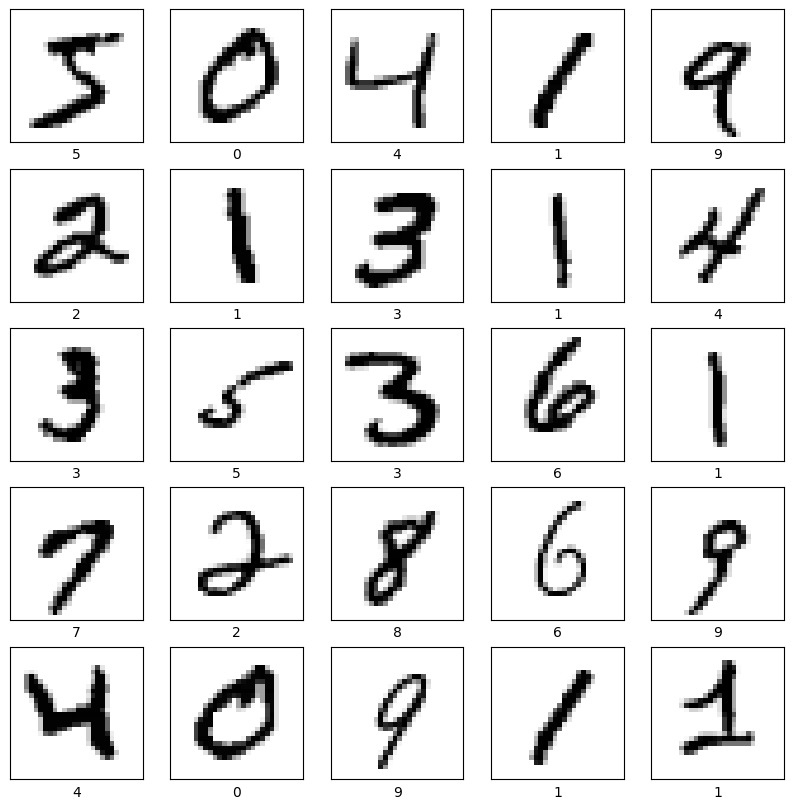

In [3]:
# Normalization of pixel values (0 - 1)
train_images, test_images = train_images / 255.0, test_images / 255.0

# Data verification
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# 4. Model selection and training

In [4]:
# Convloutional base creation
model = models.Sequential()
model.add(layers.Conv2D(4, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Model's arquitecture so far
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 4)      │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 4)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Adding of dense layers
model.add(layers.Flatten())
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(10))

# Final model's arquitecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 4)      │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 676)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │         5,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │            90 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,546 (21.66 KB)

 Trainable params: 5,546 (21.66 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Compilation & training of the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.6867 - loss: 0.9190 - val_accuracy: 0.9109 - val_loss: 0.3074
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9181 - loss: 0.2807 - val_accuracy: 0.9414 - val_loss: 0.1991
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9413 - loss: 0.1981 - val_accuracy: 0.9514 - val_loss: 0.1582
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9517 - loss: 0.1588 - val_accuracy: 0.9576 - val_loss: 0.1358
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9558 - loss: 0.1474 - val_accuracy: 0.9617 - val_loss: 0.1280


# 5. Model testing

313/313 - 1s - 4ms/step - accuracy: 0.9617 - loss: 0.1280


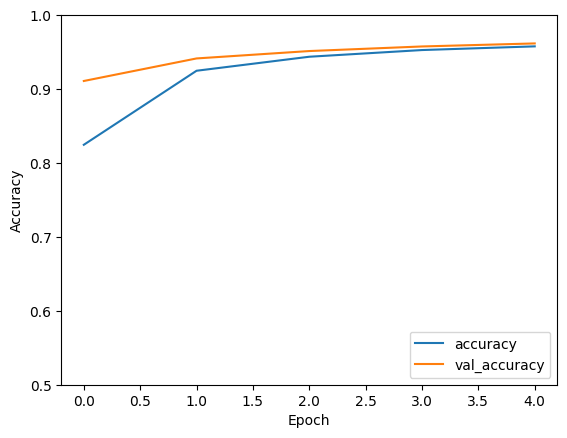

In [7]:
# Model evaluation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [8]:
# Test accuracy
print(test_acc)

0.9617000222206116


In [9]:
# Image + prediction function
def plot_image(i, predictions_array, true_label, img):
    true_label = true_label[i]
    img = img[i]

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(
        class_names[predicted_label],
        100 * np.max(predictions_array),
        class_names[true_label]
    ), color=color)


# Prediction array graph function
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]

    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])

    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])

    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Predictions function
test_images_expanded = np.expand_dims(test_images, -1)
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images_expanded)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


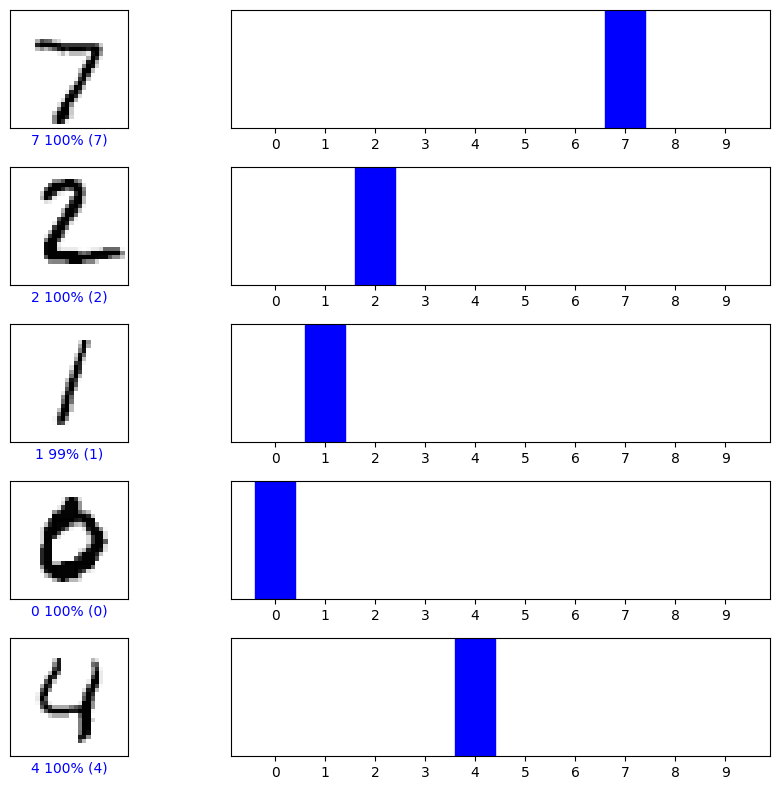

In [10]:
# 5 predictions
num_predictions = 5
plt.figure(figsize=(10, 8))

for i in range(num_predictions):
    plt.subplot(num_predictions, 2, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)

    plt.subplot(num_predictions, 2, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()

# Questions

1. How many epochs did you use to improve the performance of the model compared with the feedforward neural network of assignment 5?

In this model we used only 5 epochs instead of 10 like in the feedforward model. The CNN achieved higher performance in less less epochs due to its ability to learn local spatial features from images.

2. Did you get a better performance on this assignment or on assignment 5? Why?

The performance in this assignment (the CNN) was better than in assignment 5. This is because a feedforward neural network treats each pixel independently as a flat vector, ignoring spatial relationships. In contrast, a CNN uses convolutional filters to detect edges, shapes, and visual patterns, which makes it significantly more effective for image classification tasks like MNIST.
Therefore, the CNN achieved higher accuracy (0.9617) and more reliable predictions.